# Chapter08 표본분포와 통계적 추정

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.__version__

'1.19.2'

## 0.실습기초

### A.시드값 설정: 매번 동일한 난수를 얻기 위해 

In [4]:
np.random.seed(0) #동일한 난수 얻기 위해서

### B.(난수)표본추출

In [5]:
#random.random(size=None) 
np.random.random()   #0.0~1.0 사이의 실수 값 1개

0.5488135039273248

In [6]:
#random.random(size=None)
np.random.random(10)  #0.0~1.0 사이의 실수 값 10개 추출

array([0.71518937, 0.60276338, 0.54488318, 0.4236548 , 0.64589411,
       0.43758721, 0.891773  , 0.96366276, 0.38344152, 0.79172504])

#### 실수 표본추출(정규분포:standard normal distribution) 

In [7]:
#random.randn(d0, d1, ..., dn)
np.random.randn()   #-1.0~1.0사이의 임의의 수 추출

2.5452007784710537

In [8]:
np.random.randn(10)  #-1~1사이의 임의의 수 추출

array([ 1.08081191,  0.48431215,  0.57914048, -0.18158257,  1.41020463,
       -0.37447169,  0.27519832, -0.96075461,  0.37692697,  0.03343893])

In [9]:
np.random.randn(2, 4) #-1~1사이의 임의의 수를 2행 4열 형태로 추출

array([[ 0.68056724, -1.56349669, -0.56669762, -0.24214951],
       [ 1.51439128, -0.3330574 ,  0.04736482,  1.46274045]])

#### 정수 표본추출(이상균등분포: discrete uniform distibution)

In [10]:
#random.randint(low, high=None, size=None, dtype=int)
np.random.randint(10) #0~9사이의 임의의 정수 1개 추출

4

In [11]:
#random.randint(low, high=None, size=None, dtype=int)
np.random.randint(1, 11)  #1~10사이의 임의의 정수 1개 추출

2

In [12]:
np.random.randint(2, size=10) #0~1사이의 임의의 정수 10개 추출

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [13]:
np.random.randint(1, 11, size=10) #1~10사이의 임의의 정수 10개 추출

array([10, 10,  4,  7,  8,  3,  1,  4,  6, 10])

In [14]:
np.random.randint(5, size=(2, 4)) #0~4사이의 임의의 정수를 2행 4열 형태로 추출

array([[2, 4, 3, 4],
       [4, 4, 3, 4]])

### C.(모집단)표본추출

#### - 복원추출

In [61]:
# random.choice(a, size=None, replace=True, p=None)
# np.random.choice(모집단, 표본크기)
np.random.choice(5, 2)   # 모집단(0~4의 정수) 중에 1개 추출

array([0, 1])

In [16]:
# random.choice(a, size=None, replace=True, p=None)
# np.random.choice(모집단, 표본크기)
np.random.choice([1,2,3,4,5], 3)   #[1,2,3,4,5]리스트 요소 중에 3개 추출

array([5, 1, 5])

#### - 비복원추출

In [17]:
np.random.choice([1,2,3,4,5], 3, replace=False) #한번 뽑은 값은 다시 뽑지 않기 때문에 중복되는 값이 없다.

array([1, 5, 2])

----------------------------------------------------------

## 1.모집단 분포와 표본분포

[예제8-1] 경부고속도록 서울 요금소~ 부산 구서 나들목에 있는 34개의 나들목 사이의 거리 측정 결과

In [18]:
import pandas as pd

df = pd.read_csv("data/distance.csv", header=None)
N  = np.array(df[0].tolist())
N

array([ 9.59,  4.62,  0.65,  7.75, 16.98, 11.78,  7.24, 10.15, 25.49,
       11.44, 10.37,  9.33, 15.04, 12.16, 16.63, 12.06,  9.7 , 12.46,
        8.05, 19.91,  5.58, 12.48,  4.35, 16.41, 22.53, 17.56, 18.4 ,
       10.86, 27.43,  7.39, 14.57, 11.92,  2.  ])

In [19]:
D =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  
# N = np.array(D)

### 모수 (외워놓으면 시험볼때 개꿀)

#### a.모평균

In [56]:
np.round(N.mean(),2) # N.mean은 배열 N의 평균, np.round로 소수점 맞추기

12.21

In [57]:
N

array([ 9.59,  4.62,  0.65,  7.75, 16.98, 11.78,  7.24, 10.15, 25.49,
       11.44, 10.37,  9.33, 15.04, 12.16, 16.63, 12.06,  9.7 , 12.46,
        8.05, 19.91,  5.58, 12.48,  4.35, 16.41, 22.53, 17.56, 18.4 ,
       10.86, 27.43,  7.39, 14.57, 11.92,  2.  ])

In [21]:
N.mean()

12.208484848484849

#### b.모분산

In [52]:
np.round(N.var(),2)

37.35

In [53]:
N.var()

37.34943103764921

#### c.모표준편차

In [54]:
np.round(N.std(),2)

6.11

In [55]:
N.std()

6.111418087289497

### 통계량

#### a-1.표본평균

In [24]:
samples = np.array([7.75, 9.70, 10.86])

In [25]:
X_ = samples.sum() / len(samples)
np.round(X_, 2)

9.44

#### b-1.표본분산

In [26]:
S2 = 1/(len(samples) -1) *  sum([(i - X_)**2 for i in samples ])
np.round(S2, 2)

2.47

#### c-1.표본표준편차

In [27]:
S = np.sqrt(S2)
np.round(S, 2)

1.57

## I Can Do 8-2

In [28]:
import numpy as np
import matplotlib.pyplot as plt

sample_2 = np.array([45, 54, 67])
sample_2

array([45, 54, 67])

In [29]:
#(a) 표본평균

E = np.round(sample_2.sum() / len(sample_2), 2)
E

55.33

In [30]:
#(b) 표본분산

V = round(1/(len(sample_2) - 1) * sum((i - E)**2 for i in sample_2), 2)
V

122.33

In [31]:
#(c) 표본표준편차

S = round(np.sqrt(V), 2)
S

11.06

### A.표본평균의 분포

#### 경우의 수
n=2인 표본평균의 경우의 수

In [102]:
import itertools

n = 2

result = list(itertools.product(([1,2,3,4]), repeat=n)) # 복원추출
print("**경우의 수 : %s개" % len(result))
print(result)

**경우의 수 : 16개
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]


#### x_set: 확률변수 상태공간

In [103]:
x_set = [sum([j for j in i])/n for i in result] 
x_set = np.array(list(set(x_set)))
x_set

array([1. , 2. , 3. , 2.5, 1.5, 3.5, 4. ])

#### 확률질량함수: f(x)   // 복습 해보기

In [104]:
def f(x):
    cnt = 0
    for i in result:
        if sum([j for j in i])/n == x:
            cnt += 1
    return cnt / (len(result)) # 전체 분의 조건 만족한 횟수 = 확률질량함수

#### 확률변수: X

In [105]:
X = [x_set, f]
X

[array([1. , 2. , 3. , 2.5, 1.5, 3.5, 4. ]), <function __main__.f(x)>]

#### 확률: P(prob)

In [106]:
prob = [ f(x_k) for x_k in x_set]
prob

[0.0625, 0.1875, 0.1875, 0.25, 0.125, 0.125, 0.0625]

In [107]:
prob = np.array(prob)
prob

array([0.0625, 0.1875, 0.1875, 0.25  , 0.125 , 0.125 , 0.0625])

#### a.표본평균의 기대값

In [108]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

E(X)

2.5

#### b.표본평균의 분산

In [109]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])
    #return np.sum([(x_k)**2 * f(x_k) for x_k in x_set]) - (mean)**2

V(X)

0.625

In [110]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

In [111]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))  #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)         #y축의 한계 지정
    ax.legend()
    
    plt.show()    

In [112]:
check_prob(X)

기대값 E(X): 2.5
분산   V(X): 0.625


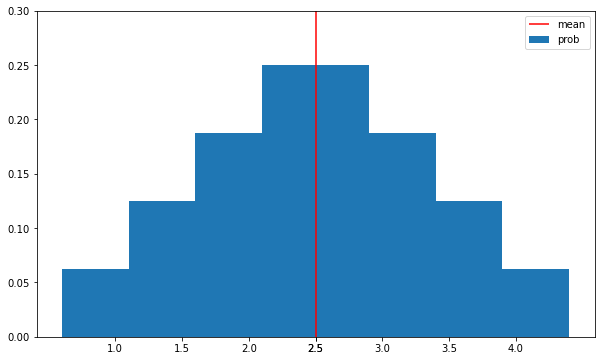

In [113]:
plot_prob(X)

## I Can Do 8-3

In [122]:
import itertools

n = 2

result = list(itertools.product(([-1, 0, 1]), repeat=n)) # 복원추출
print("**경우의 수 : %s개" % len(result))
print(result)

**경우의 수 : 9개
[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]


In [123]:
y_set = [sum([j for j in i])/n for i in result] 
y_set = np.array(list(set(y_set)))
y_set

array([-0.5,  0. ,  1. ,  0.5, -1. ])

In [124]:
Y = [y_set, f]
Y

[array([-0.5,  0. ,  1. ,  0.5, -1. ]), <function __main__.f(x)>]

In [125]:
prob = np.array([f(y_k) for y_k in y_set])
prob = np.round(prob, 2)
prob

array([0.22, 0.33, 0.11, 0.22, 0.11])

In [134]:
def E(Y):
    y_set, f = Y
    return np.sum([y_k * f(y_k) for y_k in y_set])

E(Y)

0.0

In [127]:
def V(Y):
    y_set, f = Y
    mean = E
    return np.sum([(y_k - mean)**2 * f(y_k) for y_k in y_set])
    #return np.sum([(x_k)**2 * f(x_k) for x_k in x_set]) - (mean)**2

V = np.round(V(Y), 2)
V

0.33

In [132]:
def check_prob(Y):
    y_set, f = Y
    prob = np.array([ f(y_k) for y_k in y_set])  
    
    print(f'기대값 E(Y): {E:.4}')
    print(f'분산   V(Y): {V:.4}')
check_prob(Y)

기대값 E(Y): 0.0
분산   V(Y): 0.33


## 도수분포표로 평균, 분산 구하기

In [60]:
import math 
import numpy as np
import pandas as pd

data = [26,31,28,38,41,26,18,16,25,29,
       39,38,38,40,43,38,39,41,41,40,
       26,19,39,28,43,34,21,41,29,30,
       12,22,45,34,29,26,29,58,42,16,
       41,42,38,42,28,42,39,41,39,43]

k = 5   #계급의 수
start = min(data)-0.5   #계급간격 시작값
step = math.ceil((max(data)-min(data))/k)  #계급의 간격
bins = np.arange(min(data)-0.5, max(data), step=step)  #계급

#계급구간
idx = [ str(bins[i])+'~'+str(bins[i+1] 
            if i<(len(bins)-1) else np.max(bins)+step ) 
           for i in range(len(bins))]    #계급구간
#도수 데이터
bins = np.append(bins, np.array([np.max(bins) + step]))
hist, bins = np.histogram(data, bins)
val = hist

# 도수분포표 만들기
#,'상대도수','누적도수','누적상대도수','계급값']
df = pd.DataFrame(val, index=idx, columns=['도수'])
df.index.name = '계급간격'

df['상대도수'] = [val[x]/sum(val) for x in range(k)]
df['누적도수'] = [sum([val[i] for i in range(x+1)]) for x in range(k)]

val2 = df['상대도수'].values

df['누적상대도수'] = [sum([val2[i] for i in range(x+1)]) for x in range(k)]
df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

A = df['계급값'].values
B = (sum(A[x] * val[x] for x in range(k)) / len(data)) #평균
C = sum((A[x] - B)**2*val[x] for x in range(k)) / 49 # 분산

df['편차'] = [(A[x] - B) for x in range(k)]
df['편차^2'] = [(A[x] - B)**2 for x in range(k)]
df['편차^2*도수'] = [(A[x] - B)**2*val[x] for x in range(k)]
val3 = df['편차^2*도수'].values


#df.loc['합계'] = df.iloc[:,:2].sum(axis=0, skipna=True)
df.loc['합계'] = [sum(val),sum(val2),'','','','','',sum(val3)]

print("분산: ", np.round(C, 2))
df

분산:  92.29


,도수,상대도수,누적도수,누적상대도수,계급값,편차,편차^2,편차^2*도수
계급간격,,,,,,,,
11.5~21.5,6,0.12,6,0.12,16.5,-16.6,275.56,1653.36
21.5~31.5,15,0.30,21,0.42,26.5,-6.6,43.56,653.40
31.5~41.5,20,0.40,41,0.82,36.5,3.4,11.56,231.20
41.5~51.5,8,0.16,49,0.98,46.5,13.4,179.56,1436.48
51.5~61.5,1,0.02,50,1,56.5,23.4,547.56,547.56
합계,50,1.00,,,,,,4522.00
